# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sklearn
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?APPID="+weather_api_key+"&units=METRIC&q="
cityurl = url 
cityweather = requests.get(cityurl).json()
cityweather

{'cod': '400', 'message': 'Nothing to geocode'}

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?APPID="+weather_api_key+"&q="

citydata = []
recordcount = 1 
setcount = 1 

for i,city in enumerate(cities):
    if (i%50==0 and i>=50): 
        setcount +=1
        recordcount =0
    cityurl = url + city 
    print("Processing Record %s of Set %s | %s" %(recordcount,setcount,city))
    recordcount +=1
    try:
        cityweather = requests.get(cityurl).json()       
        cloudiness = cityweather["clouds"]["all"]
        country = cityweather["sys"]["country"]
        date = cityweather["dt"]       
        humidity = cityweather["main"]["humidity"]      
        lat = cityweather["coord"]["lat"]           
        lng = cityweather["coord"]["lon"]           
        maxtemp = cityweather["main"]["temp_max"]       
        windspeed = cityweather["wind"]["speed"] 
        
        citydata.append({"City":city,       
                        "Cloudiness":cloudiness,    
                        "Country":country,      
                        "Date":date,          
                        "Humidity":humidity,      
                        "Lat":lat,          
                        "Lng":lng,           
                        "Max Temp":maxtemp,      
                        "Wind Speed":windspeed})

    except:
        print("City not found. Skipping...")
        pass
    
print("complete")

    

Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | were ilu
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | nambucca heads
Processing Record 6 of Set 1 | tezu
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | nam tha
City not found. Skipping...
Processing Record 9 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | gulmarg
Processing Record 14 of Set 1 | shimoda
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | inuvik
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 19 of Set 1 | nacozari
Processing Record 20 of Set 1 | guaratinga
City not found. Skipping...
Processing Record 21 of Set 1 | gua

Processing Record 32 of Set 4 | alofi
Processing Record 33 of Set 4 | airai
Processing Record 34 of Set 4 | kochi
Processing Record 35 of Set 4 | bredasdorp
Processing Record 36 of Set 4 | west bay
Processing Record 37 of Set 4 | merauke
Processing Record 38 of Set 4 | tura
Processing Record 39 of Set 4 | pokrovsk
Processing Record 40 of Set 4 | lamu
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | omachi
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | qurayyat
City not found. Skipping...
Processing Record 45 of Set 4 | puri
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | adrar
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | nipawin
Processing Record 0 of Set 5 | marcona
City not found. Skipping...
Processing Record 1 of Set 5 | kampot
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | qaqortoq

Processing Record 16 of Set 8 | wampusirpi
City not found. Skipping...
Processing Record 17 of Set 8 | portland
Processing Record 18 of Set 8 | bubaque
Processing Record 19 of Set 8 | samarai
Processing Record 20 of Set 8 | roma
Processing Record 21 of Set 8 | antsohihy
Processing Record 22 of Set 8 | oskarshamn
Processing Record 23 of Set 8 | yumen
Processing Record 24 of Set 8 | pacifica
Processing Record 25 of Set 8 | tawkar
City not found. Skipping...
Processing Record 26 of Set 8 | pamanukan
Processing Record 27 of Set 8 | sorkjosen
City not found. Skipping...
Processing Record 28 of Set 8 | ruteng
Processing Record 29 of Set 8 | skibbereen
Processing Record 30 of Set 8 | alice springs
Processing Record 31 of Set 8 | hastings
Processing Record 32 of Set 8 | port-gentil
Processing Record 33 of Set 8 | aldan
Processing Record 34 of Set 8 | brufut
Processing Record 35 of Set 8 | coahuayana
Processing Record 36 of Set 8 | wanaka
Processing Record 37 of Set 8 | ruidoso
Processing Recor

Processing Record 1 of Set 12 | yenagoa
Processing Record 2 of Set 12 | abnub
Processing Record 3 of Set 12 | salinas
Processing Record 4 of Set 12 | novaya igirma
Processing Record 5 of Set 12 | eskasem
City not found. Skipping...
Processing Record 6 of Set 12 | alugan
Processing Record 7 of Set 12 | carballo
Processing Record 8 of Set 12 | matara
Processing Record 9 of Set 12 | jalu
Processing Record 10 of Set 12 | lamesa
Processing Record 11 of Set 12 | chicama
Processing Record 12 of Set 12 | shenzhen
Processing Record 13 of Set 12 | awbari
Processing Record 14 of Set 12 | gaeta
Processing Record 15 of Set 12 | concepcion del oro
Processing Record 16 of Set 12 | rosarito
Processing Record 17 of Set 12 | conakry
Processing Record 18 of Set 12 | fairbanks
Processing Record 19 of Set 12 | irbit
Processing Record 20 of Set 12 | filadelfia
Processing Record 21 of Set 12 | svetlyy
City not found. Skipping...
Processing Record 22 of Set 12 | wonthaggi
Processing Record 23 of Set 12 | kush

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# establish dataframe
weather_df = pd.DataFrame(citydata)

In [7]:
# show the top of the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hithadhoo,100,MV,1571078274,85,-0.60,73.08,299.80,6.811
1,punta arenas,1,CL,1571078274,35,-53.16,-70.91,287.15,9.800
2,were ilu,31,ET,1571078275,74,10.60,39.43,282.30,2.687
3,vila velha,20,BR,1571078275,62,-3.71,-38.60,302.15,7.200
4,nambucca heads,63,AU,1571078275,87,-30.64,152.99,289.15,1.053


In [12]:
#only ran once to use for Vacation.Py 
#weather_df.to_csv("weatherdata.csv",index_label="city_id")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

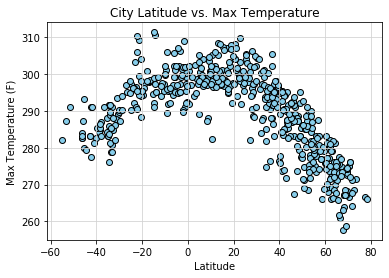

In [8]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

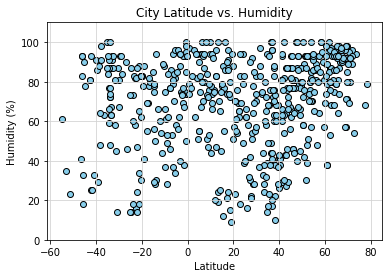

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,110)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

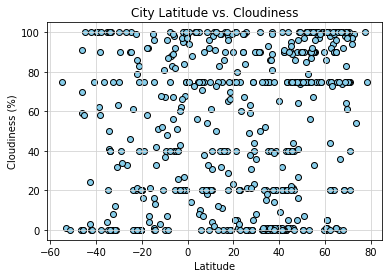

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

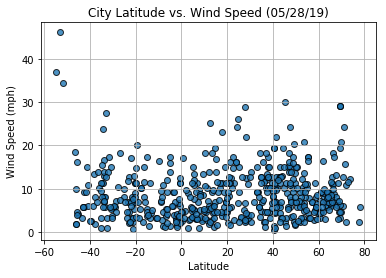

In [48]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

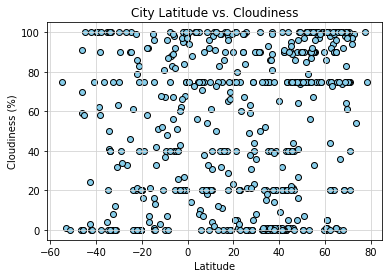

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
lat = weather_df['Lat']
cloud = weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsCloudiness.png")
plt.show()

In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


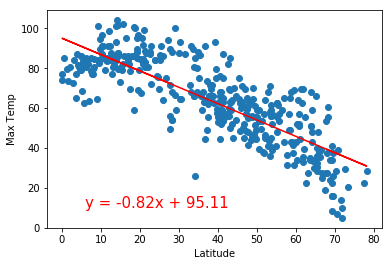

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


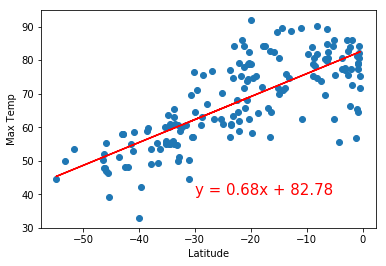

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


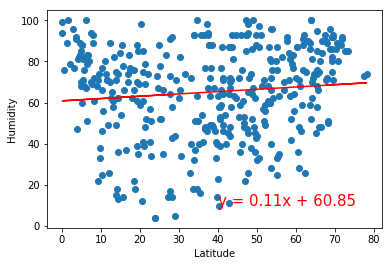

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


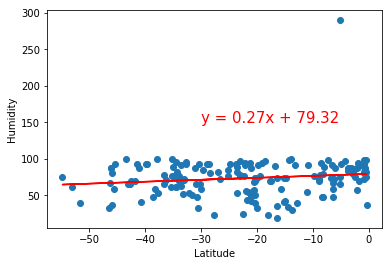

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


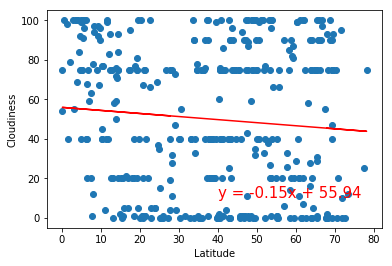

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


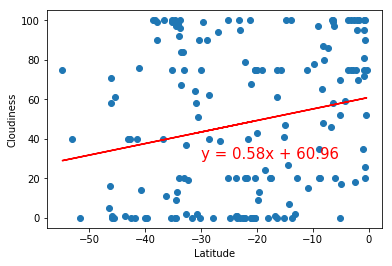

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


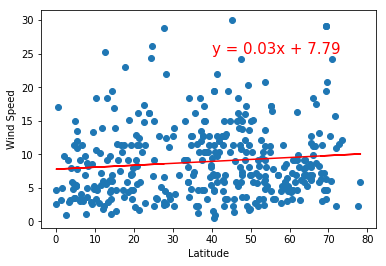

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


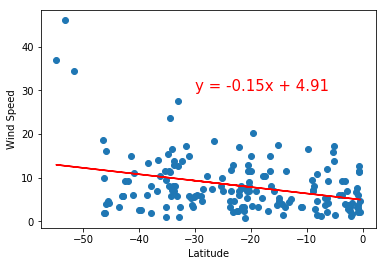